In [41]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras import layers
from sklearn.preprocessing import LabelEncoder

In [42]:
warnings.filterwarnings("ignore")

In [43]:
df = pd.read_csv("data/dataset.csv")
df = shuffle(df, random_state=42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Preprocessing**

In [44]:
for col in df.columns:
    df[col] = df[col].str.replace('_',' ')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Acne,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,stomach bleeding,chest pain,chest pain,loss of smell,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [46]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


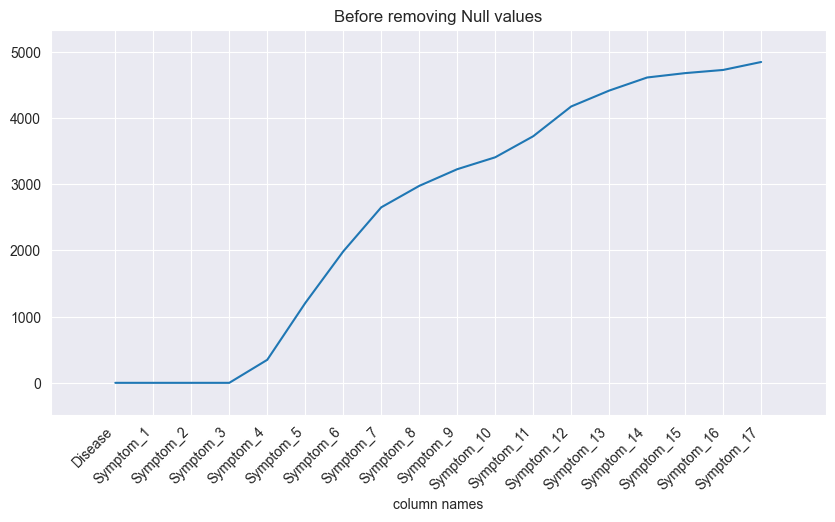

In [47]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('Before removing Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [48]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


**Load symptom severity dataset**

In [50]:
df1 = pd.read_csv('data/Symptom-severity.csv')
df1['Symptom'] = df1['Symptom'].str.replace('_',' ')
df1.head()

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


In [51]:
df1['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

**Replace symptoms with their corresponding weights**

In [52]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]

d = pd.DataFrame(vals, columns=cols)
d.head(20)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0
5,Hypertension,3,7,4,4,3,0,0,0,0,0,0,0,0,0,0,0,0
6,Hypoglycemia,5,4,4,3,3,5,5,4,4,4,2,4,0,0,0,0,0
7,Arthritis,2,4,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Hepatitis B,1,4,2,3,4,4,4,4,4,6,5,2,0,0,0,0,0
9,Migraine,3,5,3,5,4,4,3,2,3,0,0,0,0,0,0,0,0


In [53]:
d = d.replace('dischromic  patches', 0).infer_objects(copy=False)
d = d.replace('spotting  urination', 0).infer_objects(copy=False)
df = d.replace('foul smell of urine', 0).infer_objects(copy=False)
df.head(20)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0
5,Hypertension,3,7,4,4,3,0,0,0,0,0,0,0,0,0,0,0,0
6,Hypoglycemia,5,4,4,3,3,5,5,4,4,4,2,4,0,0,0,0,0
7,Arthritis,2,4,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Hepatitis B,1,4,2,3,4,4,4,4,4,6,5,2,0,0,0,0,0
9,Migraine,3,5,3,5,4,4,3,2,3,0,0,0,0,0,0,0,0


In [54]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


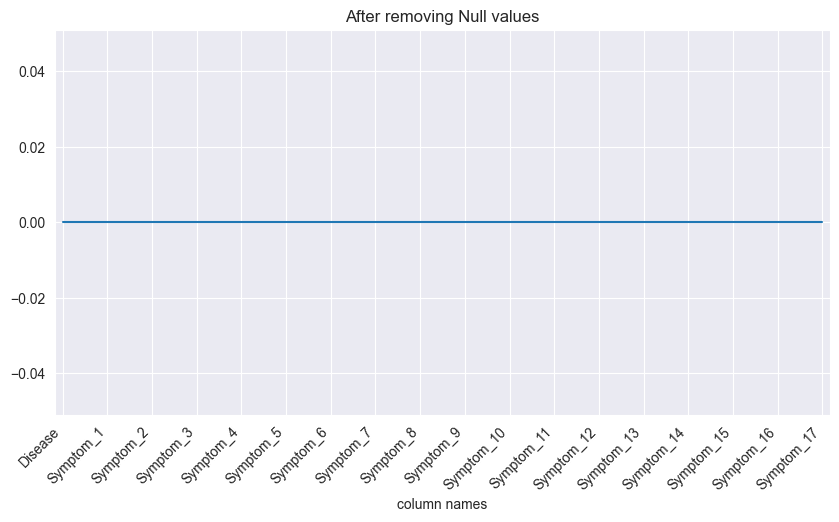

In [55]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('After removing Null values')
plt.xlabel('column names')
plt.margins(0.01)
plt.show()

In [56]:
print("Number of symptoms used to identify the disease ",len(df1['Symptom'].unique()))
print("Number of diseases that can be identified ",len(df['Disease'].unique()))

Number of symptoms used to identify the disease  132
Number of diseases that can be identified  41


In [57]:
data = df.iloc[:,1:].values
labels = df['Disease'].values

**Splitting data in training 80% and test 20%**

In [58]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


In [59]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


**Creating the Artificial Neural Network (ANN) Model**

In [60]:
ann_model = Sequential()
ann_model.add(layers.Dense(units=100, activation='relu', input_dim=x_train.shape[1]))
ann_model.add(layers.Dense(units=50, activation='relu'))
ann_model.add(layers.Dense(units=len(df['Disease'].unique()), activation='softmax'))

**Compiling the Model**

In [61]:
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Label encoding**

In [62]:
label_encoder = LabelEncoder()

# Encode categorical variables
for col in range(x_train.shape[1]):
    if isinstance(x_train[0, col], str):
        x_train[:, col] = label_encoder.fit_transform(x_train[:, col])
        x_test[:, col] = label_encoder.transform(x_test[:, col])

In [63]:
label_encoder.fit(df['Disease'].unique())
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

**Fit the ANN model to the training data**

In [64]:
history = ann_model.fit(
    x_train, 
    y_train, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.1, 
    verbose=1
)

Epoch 1/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1601 - loss: 3.4352 - val_accuracy: 0.4543 - val_loss: 2.0379
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5567 - loss: 1.7337 - val_accuracy: 0.7487 - val_loss: 1.1455
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7606 - loss: 1.0481 - val_accuracy: 0.8325 - val_loss: 0.8450
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8425 - loss: 0.7611 - val_accuracy: 0.8629 - val_loss: 0.7059
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8633 - loss: 0.5966 - val_accuracy: 0.8706 - val_loss: 0.5961
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8948 - loss: 0.4829 - val_accuracy: 0.9086 - val_loss: 0.4912
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8977 - loss: 0.4334 - val_accuracy: 0.8985 - val_loss: 0.4554
Epoch 8/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9068 - loss: 0.3751 - val_accuracy: 0.

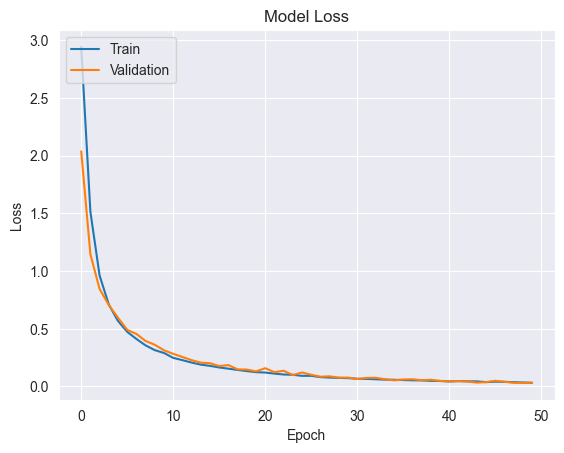

In [65]:
# plot training and loss from history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Predictions on the test data**

In [66]:
pred_probs = ann_model.predict(x_test)
preds = np.argmax(pred_probs, axis=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [67]:
# decode the predictions
preds = label_encoder.inverse_transform(preds)
y_test = label_encoder.inverse_transform(y_test)


In [68]:
# print the predictions with its actual value in a table
df_preds = pd.DataFrame({'Actual': y_test, 'Predicted': preds})
df_preds.head(10)


,Actual,Predicted
0,Migraine,Migraine
1,Peptic ulcer diseae,Peptic ulcer diseae
2,Fungal infection,Fungal infection
3,Hypoglycemia,Hypoglycemia
4,Hepatitis B,Hepatitis B
5,Hepatitis B,Hepatitis B
6,Pneumonia,Pneumonia
7,Jaundice,Jaundice
8,AIDS,AIDS
9,Alcoholic hepatitis,Alcoholic hepatitis


**Model Accuracy**

F1-score% = 98.55193718853018 | Accuracy% = 98.6788617886179


<Axes: >

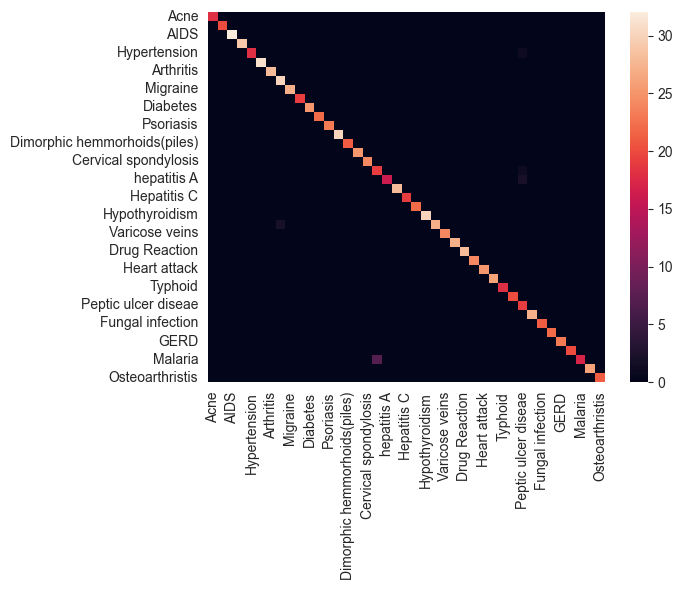

In [69]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro') * 100, '|', 'Accuracy% =', accuracy_score(y_test, preds) * 100)
sns.heatmap(df_cm)

**Export Model**

In [70]:
# Save the label encoder
import pickle
with open('./output/models/label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)
# save the models to keras
ann_model.save('output/models/ann_model.keras')

In [ ]:
# from keras.src.saving import load_model
# import pandas as pd
# import pickle
# import warnings
# 
# warnings.filterwarnings("ignore")

In [79]:
# # Load the saved models
# ann_model = load_model('./output/models/ann_model.keras')
# 
# # Load the label encoder
# with open('./output/models/label_encoder.pkl', 'rb') as file:
#     label_encoder = pickle.load(file)
# # Load the dataset and preprocess it
# df = pd.read_csv("data/dataset.csv")
# for col in df.columns:
#     df[col] = df[col].str.replace('_', ' ')
# 
# cols = df.columns
# data = df[cols].values.flatten()
# 
# s = pd.Series(data)
# s = s.str.strip()
# s = s.values.reshape(df.shape)
# 
# df = pd.DataFrame(s, columns=df.columns)
# df = df.fillna(0)
# 
# df1 = pd.read_csv('data/Symptom-severity.csv')
# df1['Symptom'] = df1['Symptom'].str.replace('_', ' ')
# 
# vals = df.values
# symptoms = df1['Symptom'].unique()
# 
# for i in range(len(symptoms)):
#     vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
# 
# d = pd.DataFrame(vals, columns=cols)
# d = d.replace('dischromic patches', 0).infer_objects(copy=False)
# d = d.replace('spotting urination', 0).infer_objects(copy=False)
# df = d.replace('foul smell of urine', 0).infer_objects(copy=False)
# 
# data = df.iloc[:, 1:].values  # Exclude the 'Disease' column
# labels = df['Disease'].values
# 
# # Ensure consistent lengths
# assert len(data) == len(labels), "Data and labels must have the same number of samples"
# 
# # Split the data into training and testing sets
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=0.8, random_state=42)
# 
# # Load the saved models
# ann_model = load_model('./output/models/ann_model.keras')
# 
# # Load the label encoder
# with open('./output/models/label_encoder.pkl', 'rb') as file:
#     label_encoder = pickle.load(file)
# 
# # Function to predict disease based on symptoms
# def predict_disease(symptoms_list):
#     # Load symptom severity data
#     symptom_severity_df = pd.read_csv('data/Symptom-severity.csv')
#     symptom_severity_df['Symptom'] = symptom_severity_df['Symptom'].str.replace('_', ' ')
#     
#     # Create a zeroed input array
#     input_data = np.zeros((1, x_train.shape[1]))
#     
#     # Encode the symptoms
#     for symptom in symptoms_list:
#         severity = symptom_severity_df[symptom_severity_df['Symptom'] == symptom]['weight'].values[0]
#         col_index = df.columns.get_loc('Symptom_' + str(symptoms_list.index(symptom) + 1))
#         input_data[0, col_index - 1] = severity  # -1 to shift since df.columns[0] is 'Disease'
#     
#     # Predict the disease
#     pred_prob = ann_model.predict(input_data)
#     pred = np.argmax(pred_prob, axis=1)
#     
#     # Decode the prediction
#     disease = label_encoder.inverse_transform(pred)
#     return disease
# 
# # Example usage
# symptoms = ['itching', 'skin rash', 'nodal skin eruptions']
# predicted_disease = predict_disease(symptoms)
# print(f'Predicted disease: {predicted_disease}')


In [77]:
from keras.src.saving import load_model
import pandas as pd
import  numpy as np
import pickle
import warnings

warnings.filterwarnings("ignore")

In [78]:

# Load the saved models
ann_model = load_model('./output/models/ann_model.keras')

# Load the label encoder
with open('./output/models/label_encoder.pkl', 'rb') as file:
    label_encoder = pickle.load(file)

# Load the dataset and preprocess it
df = pd.read_csv("data/dataset.csv")
for col in df.columns:
    df[col] = df[col].str.replace('_', ' ')

cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df = df.fillna(0)

df1 = pd.read_csv('data/Symptom-severity.csv')
df1['Symptom'] = df1['Symptom'].str.replace('_', ' ')

vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]

d = pd.DataFrame(vals, columns=cols)
d = d.replace('dischromic patches', 0).infer_objects(copy=False)
d = d.replace('spotting urination', 0).infer_objects(copy=False)
df = d.replace('foul smell of urine', 0).infer_objects(copy=False)

data = df.iloc[:, 1:].values  # Exclude the 'Disease' column
labels = df['Disease'].values

# Ensure consistent lengths
assert len(data) == len(labels), "Data and labels must have the same number of samples"

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=0.8, random_state=42)

# Function to predict possible diseases based on symptoms
def predict_possible_diseases(symptoms_list, top_n=5):
    # Load symptom severity data
    symptom_severity_df = pd.read_csv('data/Symptom-severity.csv')
    symptom_severity_df['Symptom'] = symptom_severity_df['Symptom'].str.replace('_', ' ')
    
    # Create a zeroed input array
    input_data = np.zeros((1, x_train.shape[1]))
    
    # Encode the symptoms
    for symptom in symptoms_list:
        severity = symptom_severity_df[symptom_severity_df['Symptom'] == symptom]['weight'].values[0]
        col_index = df.columns.get_loc('Symptom_' + str(symptoms_list.index(symptom) + 1))
        input_data[0, col_index - 1] = severity  # -1 to shift since df.columns[0] is 'Disease'
    
    # Predict the disease probabilities
    pred_prob = ann_model.predict(input_data)
    
    # Get top N diseases with the highest probabilities
    top_indices = np.argsort(pred_prob[0])[::-1][:top_n]
    top_diseases = label_encoder.inverse_transform(top_indices)
    top_probabilities = pred_prob[0][top_indices]
    
    # Return the top N diseases and their probabilities
    return list(zip(top_diseases, top_probabilities))

# Example usage
symptoms = ['itching', 'skin rash', 'nodal skin eruptions']
predicted_diseases = predict_possible_diseases(symptoms, top_n=5)
for disease, probability in predicted_diseases:
    print(f'Disease: {disease}, Probability: {probability:.4f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Disease: Fungal infection, Probability: 0.9923
Disease: Drug Reaction, Probability: 0.0072
Disease: Arthritis, Probability: 0.0003
Disease: AIDS, Probability: 0.0002
Disease: Gastroenteritis, Probability: 0.0001


In [80]:
import gradio as gr
# Define Gradio interface
def gradio_interface(symptoms):
    symptoms_list = [s.strip() for s in symptoms.split(',')]
    return predict_possible_diseases(symptoms_list, top_n=5)

# Create the Gradio interface
examples = [
    ["itching, skin rash, nodal skin eruptions"]
]

# Create the Gradio interface
iface = gr.Interface(
    fn=gradio_interface,
    inputs=gr.Textbox(lines=2, placeholder="Enter symptoms separated by commas..."),
    outputs="json",
    title="Disease Prediction from Symptoms",
    description="Enter symptoms separated by commas to predict possible diseases along with their probabilities.",
    examples=examples
)

# Launch the Gradio interface
iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
